In [12]:
import pandas as pd

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
5,"CALDWELL, Master Alden Gates",1911.0,1992.0,0.833333,Male,2,lived,£29.00,29.00
6,"WEST, Miss Barbara Joyce",1911.0,2007.0,0.833333,Female,2,lived,£27 15s,27.75
7,"AKS, Master Philip",1911.0,1991.0,0.833333,Male,3,lived,£9 7s,9.35
8,"ALLISON, Master Hudson Trevor",1911.0,1929.0,0.916667,Male,1,lived,£151 16s,151.80
9,"NAKID, Miss Mariayam",1911.0,1912.0,1.000000,Female,3,lived,£15 14s 10d,15.74


In [13]:
passengers_df.tail()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.5
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.5
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN
1351,"WILDING, Mr Edward",NaN,NaN,NaN,Male,1,died,NaN,NaN


In [4]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'], margins=True)

print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


Text(0, 0.5, 'Count')

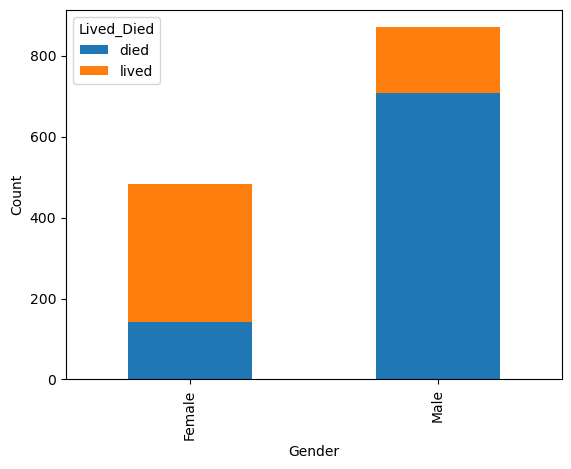

In [9]:
# Task: Create a stacked bar char showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
# exclude the last column and row (summary info)

# For plotting, do not include the margins=True
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [11]:
from scipy import stats   # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure change
# 2) Target P-value
# 3) Degrees of freedom: 1 degree of freedom. (r rows -1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age relevant?

In [16]:
# Check the age column. It is already fixed for the age at the time of incident

# What about null values?

# Create the bins
# passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10))

contingency_table = pd.crosstab(passengers_df['age_bins'], passengers_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\298969475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passengers_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)


Text(0.5, 1.0, 'Histogram of Age Ranges')

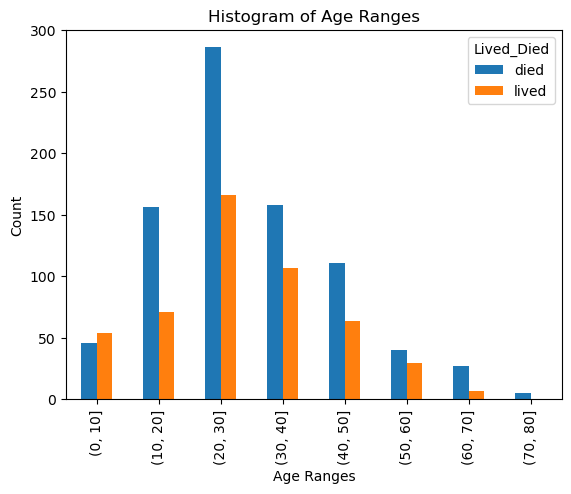

In [18]:
passengers_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Gender', 'Passenger_Class',
       'Lived_Died', 'Fare', 'Fare_decimal'],
      dtype='object')

C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\2728678035.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])# Use a pivottable
C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\2728678035.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

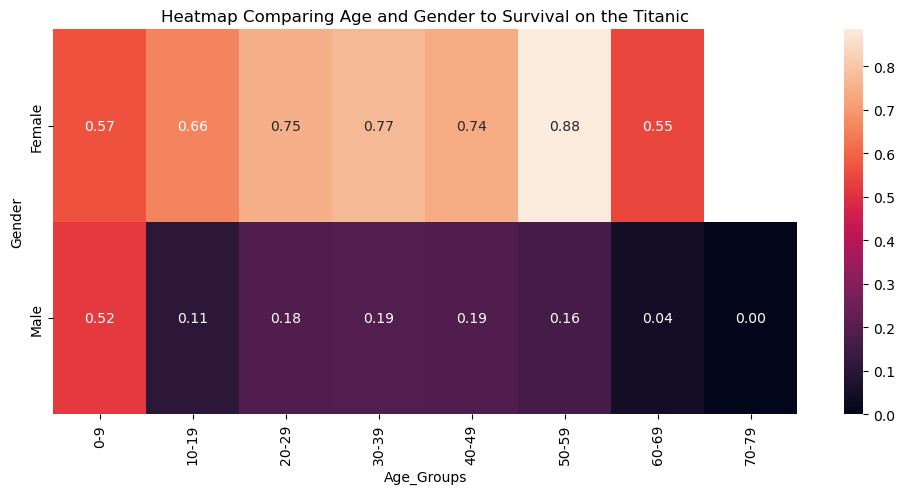

In [25]:
# Drop columns you do not need
passengers_df.drop(['Name', 'Born','Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
passengers_df.dropna(inplace=True)  # drop null values
# Encode the categorical data
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10)) # create bins
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])# Use a pivottable
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap
# Create a heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## TASK: Did the Titanic Passenger Class Affected Survivorship?

In this case, the data is `ordinal` because we can order the categories from first to third


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# Load data
passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [28]:
# Create a contingency table
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passengers_df['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Passenger_Class,,,
1,149,201,350
2,175,118,293
3,528,181,709
All,852,500,1352


<Axes: xlabel='Lived_Died'>

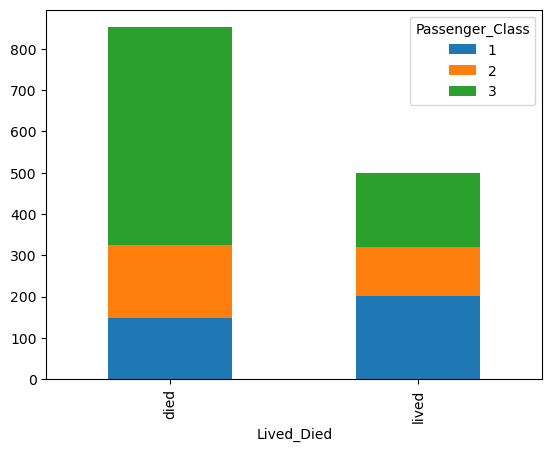

In [30]:
# Create a Bar Plot with the data stacked
contingency_table = pd.crosstab(passengers_df['Lived_Died'], passengers_df['Passenger_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)

In [31]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passengers_df['Lived_Died'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]

(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compared every passenger class to every other class to see if there is statistical significance between the two. 
- We could apply a `Chi-square` test for each of the three separate comparison, but our sample data in too small. 
- In this case, `Fisher's Exact` test is a better option

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# Load data
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passengers_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [43]:
first_class = contingency_table.iloc[0].values    # extract row values
second_class = contingency_table.iloc[1].values    # extract row values
third_class = contingency_table.iloc[2].values    # extract row values
# Create a Fisher's Exact test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Third Class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fishers Exact Test for Second and Third Class: {pvalue}')

Fishers Exact Test for First and Second Class: 1.827149276703859e-05
Fishers Exact Test for First and Third Class: 7.457205699022123e-24
Fishers Exact Test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance

Another way to conceptualize the result is to look at percentages:

| Passenger Class   |   Died    |
|-------------------|-----------|
| First Class       | 43%  |
| Second Class      | 60%  |
| Third Class       | 74%  |

TODO: Create a heatmap of Passenger Class split in Age_Ranges by Gender and survival rate

C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\1426154108.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class'])# Use a pivottable
C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\1426154108.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'PC 1: 0-9'),
  Text(1.5, 0, 'PC 1: 10-19'),
  Text(2.5, 0, 'PC 1: 20-29'),
  Text(3.5, 0, 'PC 1: 30-39'),
  Text(4.5, 0, 'PC 1: 40-49'),
  Text(5.5, 0, 'PC 1: 50-59'),
  Text(6.5, 0, 'PC1: 60-69'),
  Text(7.5, 0, 'PC 1: 70-79PC 2: 0-9'),
  Text(8.5, 0, 'PC 2: 10-19'),
  Text(9.5, 0, 'PC 2: 20-29'),
  Text(10.5, 0, 'PC 2: 30-39'),
  Text(11.5, 0, 'PC 2: 40-49'),
  Text(12.5, 0, 'PC 2: 50-59'),
  Text(13.5, 0, 'PC2: 60-69'),
  Text(14.5, 0, 'PC 2: 70-79PC 3: 0-9'),
  Text(15.5, 0, 'PC 3: 10-19'),
  Text(16.5, 0, 'PC 3: 20-29'),
  Text(17.5, 0, 'PC 3: 30-39'),
  Text(18.5, 0, 'PC 3: 40-49'),
  Text(19.5, 0, 'PC 3: 50-59'),
  Text(20.5, 0, 'PC3: 60-69'),
  Text(21.5, 0, 'PC 3: 70-79')])

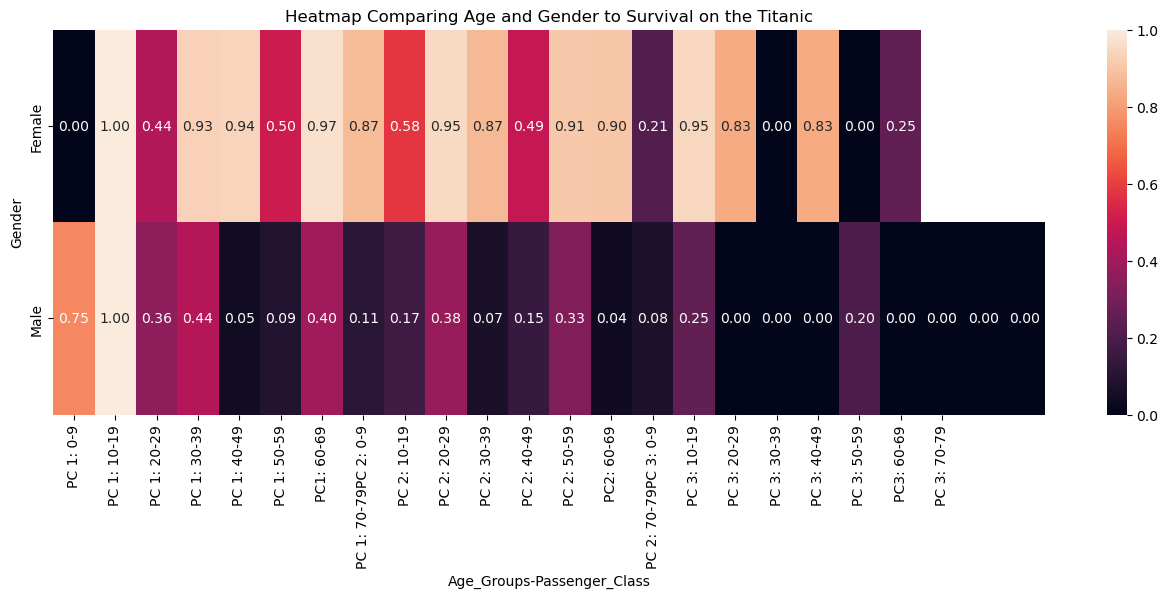

In [44]:
# Drop columns you do not need
passengers_df.drop(['Name', 'Born','Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)
passengers_df.dropna(inplace=True)  # drop null values
# Encode the categorical data
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10)) # create bins
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class'])# Use a pivottable
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap
# Create a heatmap
plt.figure(figsize=(16,5))
x_axis_labels = [
    'PC 1: 0-9', 'PC 1: 10-19', 'PC 1: 20-29', 'PC 1: 30-39', 'PC 1: 40-49', 'PC 1: 50-59', 'PC1: 60-69', 'PC 1: 70-79',
    'PC 2: 0-9', 'PC 2: 10-19', 'PC 2: 20-29', 'PC 2: 30-39', 'PC 2: 40-49', 'PC 2: 50-59', 'PC2: 60-69', 'PC 2: 70-79',
    'PC 3: 0-9', 'PC 3: 10-19', 'PC 3: 20-29', 'PC 3: 30-39', 'PC 3: 40-49', 'PC 3: 50-59', 'PC3: 60-69', 'PC 3: 70-79'
]
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)